In [18]:
#importing packages
from sklearn.model_selection import GridSearchCV
import pandas as pd
import os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as seabornInstance 
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
os.chdir('U:\\ProjectDataset')

In [3]:
dt1=pd.read_excel('gene + clinical LUAD.xlsx')

In [4]:
dt1=dt1.set_index(dt1.columns[0])


In [5]:
tar=pd.read_excel('survival_LUAD.xlsx')

In [6]:

Y=tar

In [10]:
from sklearn.model_selection import train_test_split
#split data to train, test, validation split (80/20)

X_train, X_test, y_train, y_test = train_test_split(dt1, Y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


In [31]:
from sklearn.linear_model import Ridge
ridgeReg=Ridge(alpha= 10)
ridgeReg.fit(X_train,y_train)
y_predval=ridgeReg.predict(X_val)

In [32]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))
print('Variance score: %.2f' % ridgeReg.score(X_val, y_val))

13.319114701323583
280.90041968209886
16.760084119183258
Variance score: 0.49


In [33]:
# KFOlD
estimator = ridgeReg
kfold = KFold(n_splits=2, random_state=0)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print(results)
print(results.mean(), results.std())


[-1.01837097  0.43664973]
-0.2908606202800887 0.7275103480946468


In [ ]:
# Hyper parameter optimization

tuned_parameters = {'alpha':[0.1,0.5,1.10,20,30,50,100],
                     'fit_intercept':[True,False],
                     'max_iter':[None,1,2,5,10],
                     'random_state':[0,1,42],
                      'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
                    'tol':[0.001,0.1,0.5]}
ridgeReg=Ridge()
grid=GridSearchCV(ridgeReg,tuned_parameters,scoring='r2',verbose=1)    
grid.fit(X_train,y_train)
print(grid.best_estimator_)

In [34]:
from sklearn.linear_model import Ridge
ridgeReg=Ridge(alpha= 100, fit_intercept= False, max_iter=None, random_state= 42, solver= 'sag', tol= 0.001)
ridgeReg.fit(X_train,y_train)
y_predval=ridgeReg.predict(X_val)


In [35]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))
print('Variance score: %.2f' % ridgeReg.score(X_val, y_val))

7.638752627043017
110.54930407471532
10.514242914956613
Variance score: 0.80


In [36]:
# KFOlD
estimator = ridgeReg
kfold = KFold(n_splits=2, random_state=0)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print(results)
print(results.mean(), results.std())


[0.33780291 0.69624843]
0.5170256705281561 0.179222761975654


In [38]:
                                  '''APPYING MODEL ON TESTING DATA SET'''
ridgeReg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = ridgeReg.predict(X_test)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % ridgeReg.score(X_test, y_test))


10.7091004639566
284.0624205296157
16.85415143309255
Variance score: 0.79


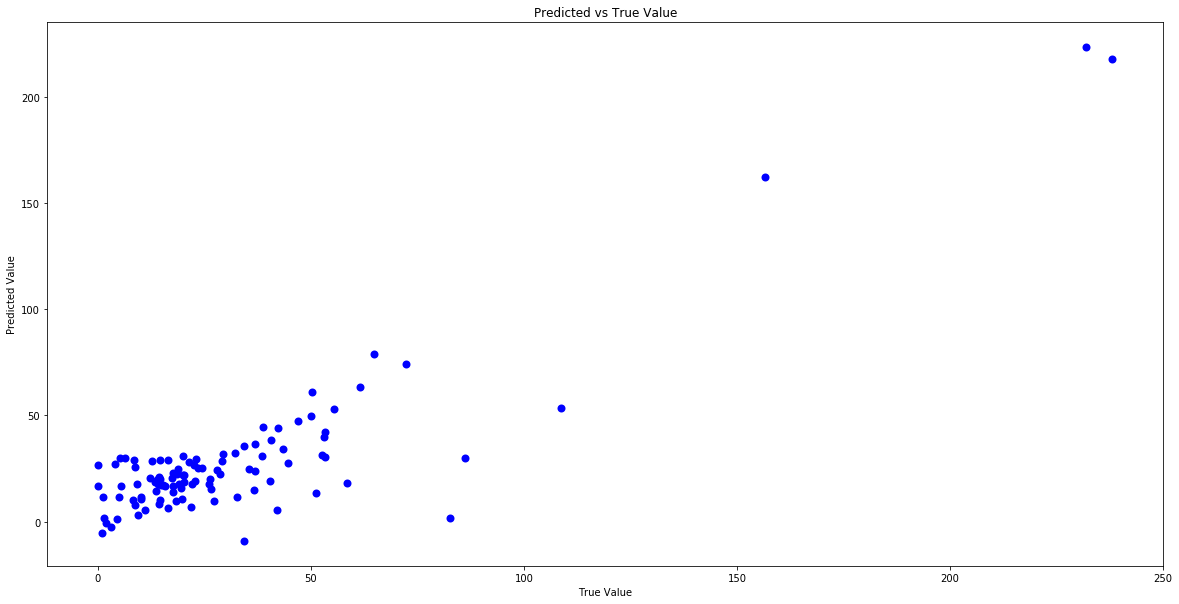

In [39]:
#True Value ~ Predicted Values

plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, color='blue', linewidth=2)
plt.title('Predicted vs True Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()